In [21]:
import rotcoord
import pygslib

# test with arbitrary gslib files

In [22]:
parameters = {
    'datafl' : '_xxx_.out',     # path to file, or none (to use '_xxx_.in') or numpy array (with columns [x,y])
    'icolx'  : 1,              # -columns with X and Y coordinates
    'icoly'  : 2,
    'outfl'  : 'test.out',      # path to the output file or None (to use '_xxx_.out')
    'xorigin': 0,            # origin of rotated system in original coordinates (pibot point)
    'yorigin': 0,
    'angle'  : 45,            # rotation angle (in degrees clockwise)
    'switch' : 0}            # -0=convert to rotated coordinate system, -1=convert from rotated system to original system

In [23]:
result =rotcoord.rotcoord(parameters)

                  Parameters for ROTCOORD
                  ***********************

START OF PARAMETERS:
_xxx_.out                          -file with data
1 2                   -columns with X and Y coordinates
test.out                           -file for output
0 0               -origin of rotated system in original coordinates (pibot point)
45                           -rotation angle (in degrees clockwise)
0                          -0=convert to rotated coordinate system
                                  -1=convert from rotated system to original system



ROTCOORD Version: 2.905

 data file = _xxx_.out                               
 columns =           1           2
 output file = test.out                                
 xorig,yorig =    0.000000E+00    0.000000E+00
 angle =       45.000000
 ireverse          0

ROTCOORD Version: 2.905 Finished

Stop - Program terminated.




In [24]:
result.head()

,X,Y,Z,IJK,Rotated X,Rotated Y
0,10.0,10.0,5.0,0.0,-3.090862e-07,14.14214
1,30.0,10.0,5.0,1.0,1.414213e+01,28.28427
2,50.0,10.0,5.0,2.0,2.828427e+01,42.42641
3,70.0,10.0,5.0,3.0,4.242641e+01,56.56854
4,90.0,10.0,5.0,4.0,5.656854e+01,70.71068


In [25]:
result.to_csv('test.csv', index=False)

# test with numpy array


In [26]:
parameters = {
    'datafl' : result[['X','Y']].values,     # path to file, or none (to use '_xxx_.in') or numpy array (with columns [x,y])
    'icolx'  : 1,              # -columns with X and Y coordinates
    'icoly'  : 2,
    'outfl'  : 'test.out',      # path to the output file or None (to use '_xxx_.out')
    'xorigin': 0,            # origin of rotated system in original coordinates (pibot point)
    'yorigin': 0,
    'angle'  : 45,            # rotation angle (in degrees clockwise)
    'switch' : 0}            # -0=convert to rotated coordinate system, -1=convert from rotated system to original system

In [27]:
result2 =rotcoord.rotcoord(parameters)
result[['Xr', 'Yr']] = result2[['Rotated X','Rotated Y']]
result.to_csv('test.csv', index=False)

                  Parameters for ROTCOORD
                  ***********************

START OF PARAMETERS:
_xxx_.in                          -file with data
1 2                   -columns with X and Y coordinates
test.out                           -file for output
0 0               -origin of rotated system in original coordinates (pibot point)
45                           -rotation angle (in degrees clockwise)
0                          -0=convert to rotated coordinate system
                                  -1=convert from rotated system to original system



ROTCOORD Version: 2.905

 data file = _xxx_.in                                
 columns =           1           2
 output file = test.out                                
 xorig,yorig =    0.000000E+00    0.000000E+00
 angle =       45.000000
 ireverse          0

ROTCOORD Version: 2.905 Finished

Stop - Program terminated.




In [28]:
result.head()

,X,Y,Z,IJK,Rotated X,Rotated Y,Xr,Yr
0,10.0,10.0,5.0,0.0,-3.090862e-07,14.14214,-3.090862e-07,14.14214
1,30.0,10.0,5.0,1.0,1.414213e+01,28.28427,1.414213e+01,28.28427
2,50.0,10.0,5.0,2.0,2.828427e+01,42.42641,2.828427e+01,42.42641
3,70.0,10.0,5.0,3.0,4.242641e+01,56.56854,4.242641e+01,56.56854
4,90.0,10.0,5.0,4.0,5.656854e+01,70.71068,5.656854e+01,70.71068


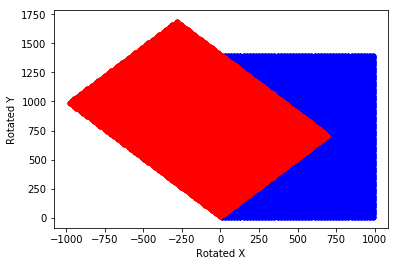

In [34]:
ax = result.plot(x= 'X', y='Y', kind = 'scatter', color='b')
result.plot(x= 'Rotated X', y='Rotated Y', kind = 'scatter', color='r', ax = ax)